# Importing Data sets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
Customer=pd.read_csv('Python casestudy/Customer.csv')
Customer

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [3]:
Customer.shape

(5647, 4)

In [4]:
Customer.isna().sum()

customer_Id    0
DOB            0
Gender         2
city_code      2
dtype: int64

In [5]:
Transaction=pd.read_csv('Python casestudy/Transactions.csv')
Transaction

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [6]:
Transaction.shape

(23053, 10)

In [7]:
Transaction.isna().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
dtype: int64

In [8]:
Product_heirarchy=pd.read_csv('Python casestudy/prod_cat_info.csv')
Product_heirarchy=Product_heirarchy.rename(columns={'prod_sub_cat_code':'prod_subcat_code'})
Product_heirarchy

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [9]:
Product_heirarchy.shape

(23, 4)

In [10]:
Product_heirarchy.isna().sum()

prod_cat_code       0
prod_cat            0
prod_subcat_code    0
prod_subcat         0
dtype: int64

# 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [11]:
Prod_tran=pd.merge(left=Transaction,right=Product_heirarchy,on=['prod_cat_code','prod_subcat_code'],how='inner')
Prod_tran

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,Clothing,Women
2,73713102191,268867,15-02-2014,1,1,1,714,74.970,788.970,MBR,Clothing,Women
3,57134739558,270625,14-02-2014,1,1,5,595,312.375,3287.375,TeleShop,Clothing,Women
4,79536458466,271944,12/2/2014,1,1,2,996,209.160,2201.160,e-Shop,Clothing,Women
...,...,...,...,...,...,...,...,...,...,...,...,...
23048,31795262740,275166,1/2/2011,1,4,4,531,223.020,2347.020,e-Shop,Bags,Mens
23049,85848725285,271131,1/2/2011,1,4,5,1043,547.575,5762.575,e-Shop,Bags,Mens
23050,12933894691,272706,31-01-2011,1,4,5,361,189.525,1994.525,MBR,Bags,Mens
23051,6442732971,273698,30-01-2011,1,4,1,1470,154.350,1624.350,e-Shop,Bags,Mens


In [12]:
Prod_tran.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
dtype: int64

# Merging Customer table with Prod_tran table to form Customer_final

In [13]:
Customer_final=pd.merge(left=Prod_tran,right=Customer,right_on='customer_Id', left_on='cust_id', how='inner')
Customer_final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
2,13181563739,270351,13-12-2011,6,5,1,1048,110.040,1158.040,e-Shop,Books,DIY,270351,26-09-1981,M,5.0
3,12236277258,270351,18-03-2013,8,3,3,1030,324.450,3414.450,e-Shop,Electronics,Personal Appliances,270351,26-09-1981,M,5.0
4,36957441426,270351,16-09-2013,3,2,3,361,113.715,1196.715,Flagship store,Footwear,Women,270351,26-09-1981,M,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,87125650,268666,9/8/2011,1,4,-5,-359,188.475,-1983.475,e-Shop,Bags,Mens,268666,11-12-1978,M,3.0
23049,87125650,268666,5/8/2011,1,4,5,359,188.475,1983.475,e-Shop,Bags,Mens,268666,11-12-1978,M,3.0
23050,34764580226,269784,20-07-2011,1,4,1,1057,110.985,1167.985,Flagship store,Bags,Mens,269784,26-04-1986,F,7.0
23051,80809115393,268084,1/4/2011,1,4,4,873,366.660,3858.660,TeleShop,Bags,Mens,268084,18-11-1970,M,1.0


In [78]:
Customer_final['tran_date']=pd.to_datetime(Customer_final['tran_date'])

In [79]:
Customer_final['city_code']=Customer_final.city_code.astype('float64')
Customer_final.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
AGE                        float64
dtype: object

In [15]:
Transaction.shape

(23053, 10)

In [16]:
Customer_final.shape

(23053, 16)

In [17]:
print('''As we can see the rows of both the 'customer_final' and 'transaction' table are same. That means all the transactions done at the Retail Store are present in the final table''')

As we can see the rows of both the 'customer_final' and 'transaction' table are same. That means all the transactions done at the Retail Store are present in the final table


# 2. Prepare a summary report for the merged data set.
# a. Get the column names and their corresponding data types

In [18]:
Customer.dtypes

customer_Id      int64
DOB             object
Gender          object
city_code      float64
dtype: object

In [19]:
Transaction.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
dtype: object

In [20]:
Product_heirarchy.dtypes

prod_cat_code        int64
prod_cat            object
prod_subcat_code     int64
prod_subcat         object
dtype: object

In [21]:
Customer_final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
dtype: object

In [22]:
Customer_final.isna().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
customer_Id         0
DOB                 0
Gender              9
city_code           8
dtype: int64

#  b. Top/Bottom 10 observations

In [23]:
Customer_final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
2,13181563739,270351,13-12-2011,6,5,1,1048,110.040,1158.040,e-Shop,Books,DIY,270351,26-09-1981,M,5.0
3,12236277258,270351,18-03-2013,8,3,3,1030,324.450,3414.450,e-Shop,Electronics,Personal Appliances,270351,26-09-1981,M,5.0
4,36957441426,270351,16-09-2013,3,2,3,361,113.715,1196.715,Flagship store,Footwear,Women,270351,26-09-1981,M,5.0
5,73713102191,268867,15-02-2014,1,1,1,714,74.970,788.970,MBR,Clothing,Women,268867,24-10-1987,F,4.0
6,25509331876,268867,12/9/2011,12,6,-4,-416,174.720,-1838.720,e-Shop,Home and kitchen,Tools,268867,24-10-1987,F,4.0
7,25509331876,268867,8/9/2011,12,6,-4,-416,174.720,-1838.720,e-Shop,Home and kitchen,Tools,268867,24-10-1987,F,4.0
8,25509331876,268867,2/9/2011,12,6,4,416,174.720,1838.720,e-Shop,Home and kitchen,Tools,268867,24-10-1987,F,4.0
9,38621155609,268867,25-08-2012,10,6,3,428,134.820,1418.820,e-Shop,Home and kitchen,Kitchen,268867,24-10-1987,F,4.0


In [24]:
Customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23043,85300368295,272913,17-12-2011,1,4,3,518,163.170,1717.170,MBR,Bags,Mens,272913,17-07-1982,F,2.0
23044,88167450510,268028,8/11/2011,1,4,-5,-608,319.200,-3359.200,Flagship store,Bags,Mens,268028,03-06-1980,M,7.0
23045,88167450510,268028,3/11/2011,1,4,5,608,319.200,3359.200,Flagship store,Bags,Mens,268028,03-06-1980,M,7.0
23046,40528384413,273953,22-09-2011,1,4,2,1148,241.080,2537.080,Flagship store,Bags,Mens,273953,02-08-1991,M,8.0
23047,84009622150,273116,26-08-2011,1,4,2,1474,309.540,3257.540,e-Shop,Bags,Mens,273116,13-10-1980,M,5.0
23048,87125650,268666,9/8/2011,1,4,-5,-359,188.475,-1983.475,e-Shop,Bags,Mens,268666,11-12-1978,M,3.0
23049,87125650,268666,5/8/2011,1,4,5,359,188.475,1983.475,e-Shop,Bags,Mens,268666,11-12-1978,M,3.0
23050,34764580226,269784,20-07-2011,1,4,1,1057,110.985,1167.985,Flagship store,Bags,Mens,269784,26-04-1986,F,7.0
23051,80809115393,268084,1/4/2011,1,4,4,873,366.660,3858.660,TeleShop,Bags,Mens,268084,18-11-1970,M,1.0
23052,12933894691,272706,31-01-2011,1,4,5,361,189.525,1994.525,MBR,Bags,Mens,272706,09-03-1974,M,8.0


# c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)


In [25]:
pd.set_option('display.float_format',lambda x: '%.2f' %x)
Customer_final.select_dtypes(['int64','float64']).describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code
count,23053.00,23053.00,23053.00,23053.00,23053.00,23053.00,23053.00,23053.00,23053.00,23045.00
mean,50073480358.45,271021.75,6.15,3.76,2.43,636.37,248.67,2107.31,271021.75,5.48
std,28981936062.00,2431.69,3.73,1.68,2.27,622.36,187.18,2507.56,2431.69,2.86
min,3268991.00,266783.00,1.00,1.00,-5.00,-1499.00,7.35,-8270.92,266783.00,1.00
25%,24938639453.00,268935.00,3.00,2.00,1.00,312.00,98.28,762.45,268935.00,3.00
50%,50093131361.00,270980.00,5.00,4.00,3.00,710.00,199.08,1754.74,270980.00,5.00
75%,75329995679.00,273114.00,10.00,5.00,4.00,1109.00,365.71,3569.15,273114.00,8.00
max,99987549630.00,275265.00,12.00,6.00,5.00,1500.00,787.50,8287.50,275265.00,10.00


# d. Frequency tables for all the categorical variables

In [26]:
Store_type_amt=pd.crosstab(Customer_final['Store_type'],Customer_final['prod_cat'],Customer_final['total_amt'],aggfunc='sum')
Store_type_amt

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Store_type,,,,,,
Flagship store,870548.83,2488205.85,1194423.23,2215136.04,1234806.56,1712567.68
MBR,848678.68,2496039.19,1287686.33,2107514.56,1112163.72,1822403.57
TeleShop,789181.06,2545005.06,1241834.36,1973338.83,1235719.29,1579702.48
e-Shop,1616300.07,5293443.93,2527193.56,4426474.20,2637084.71,3324319.57


In [27]:
Consumers=pd.crosstab(Customer_final['Gender'],columns='count of consumers')
Consumers

col_0,count of consumers
Gender,
F,11233
M,11811


In [28]:
Prod_Qty=pd.crosstab(Customer_final['prod_subcat'],'Qty')
Prod_Qty

col_0,Qty
prod_subcat,
Academic,967
Audio and video,952
Bath,1023
Cameras,985
Children,1035
Comics,1031
Computers,958
DIY,989
Fiction,1043


In [29]:
Prod_amt=pd.crosstab(Customer_final['prod_cat'],'total_amt')
Prod_amt

col_0,total_amt
prod_cat,
Bags,1998
Books,6069
Clothing,2960
Electronics,4898
Footwear,2999
Home and kitchen,4129


# 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

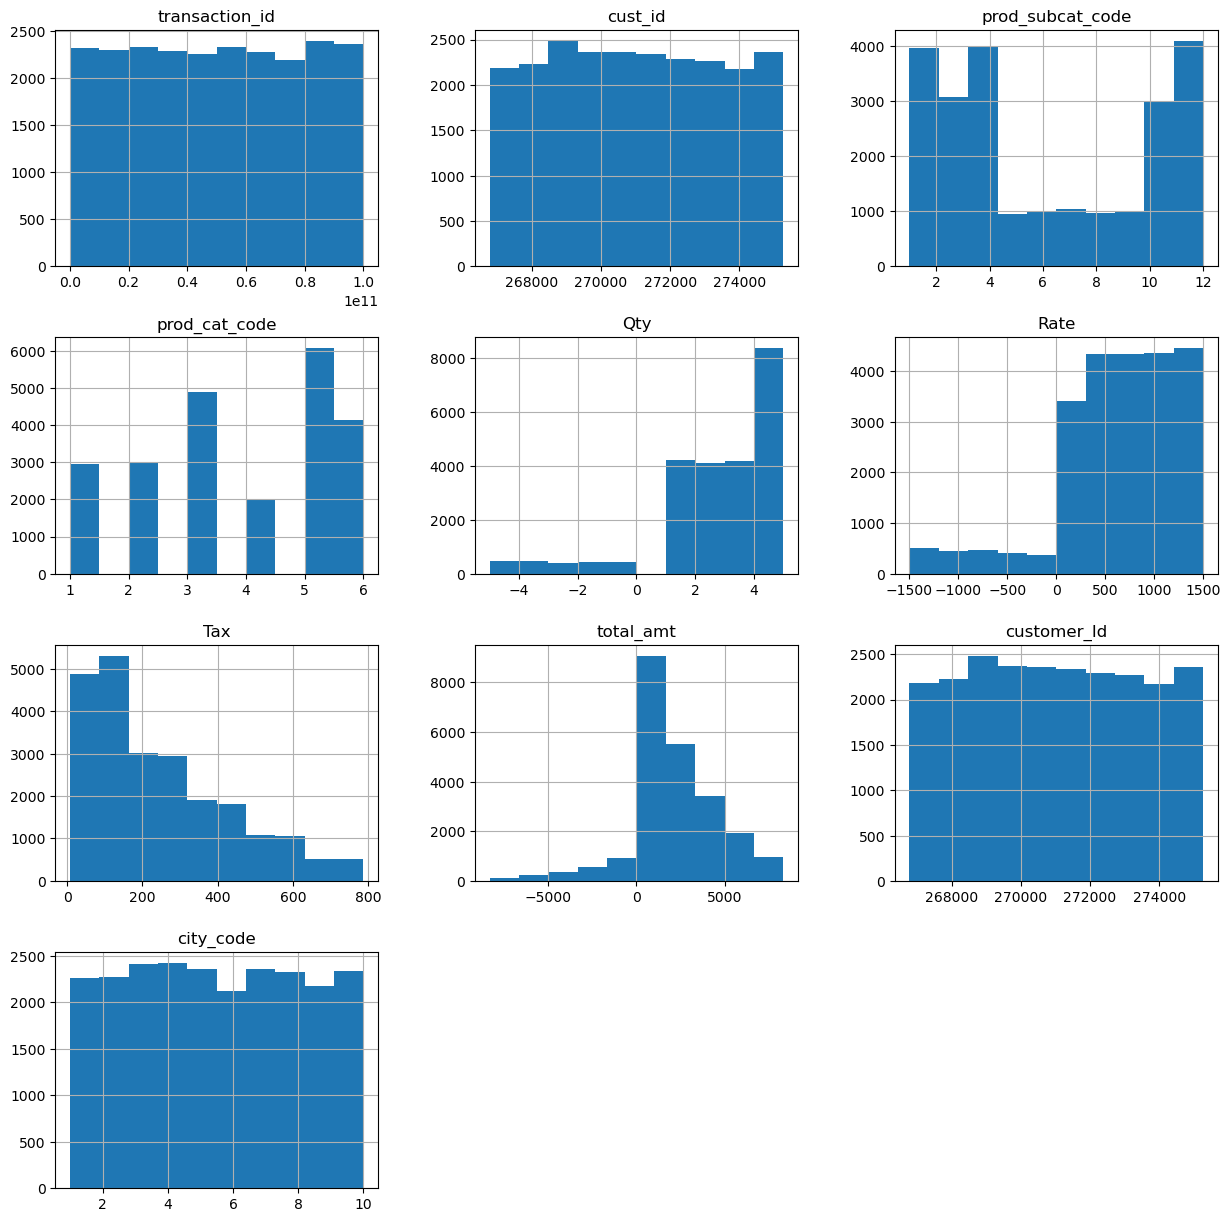

In [30]:
### Histograms for continuous variables
Customer_final.select_dtypes(['int64','float64']).hist(figsize=(15,35),layout=(9,3))
plt.show()

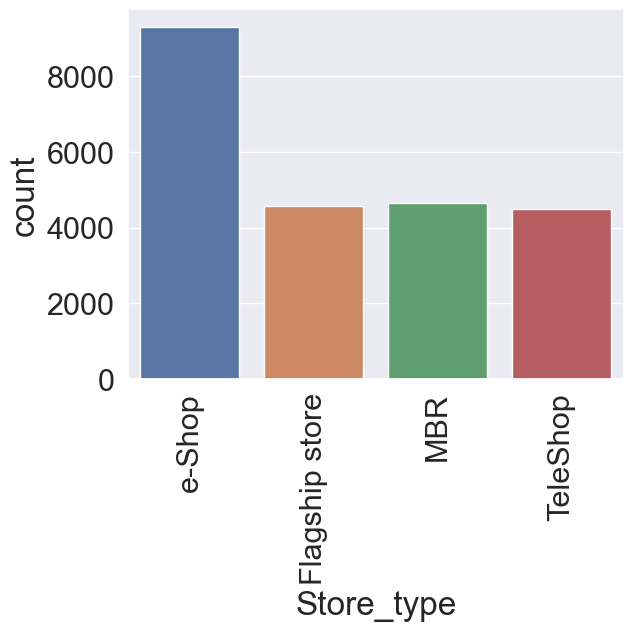

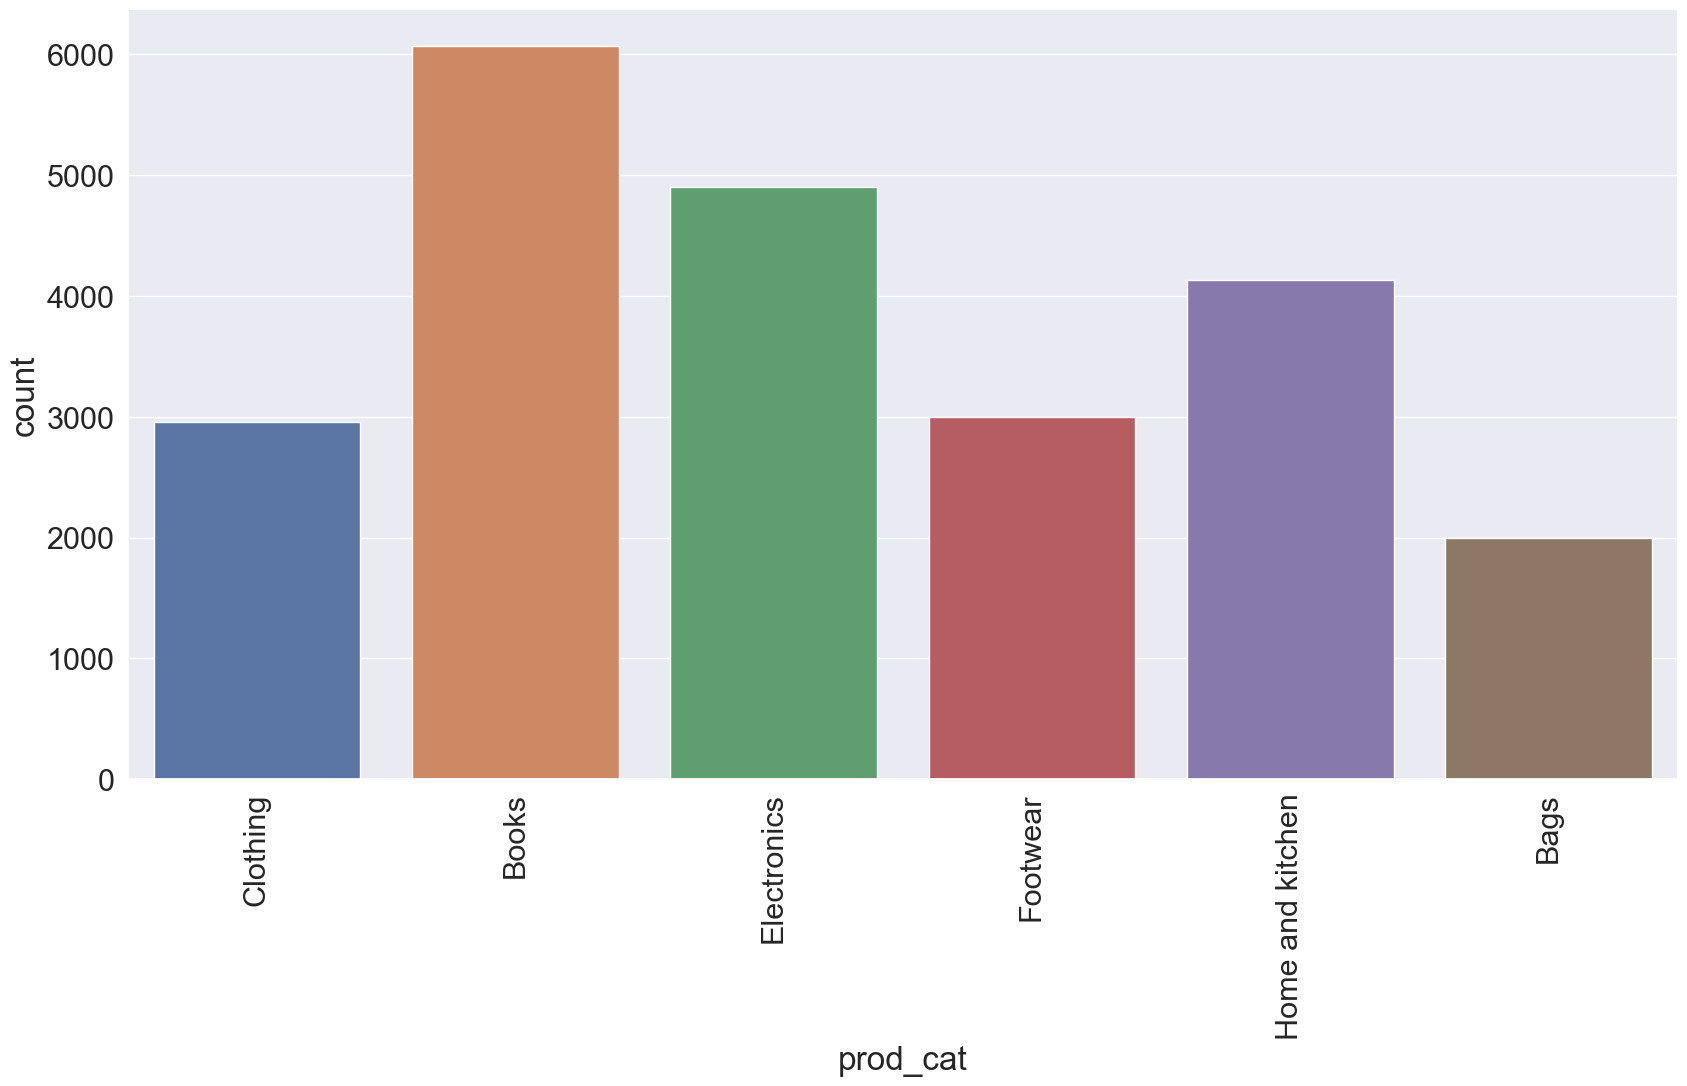

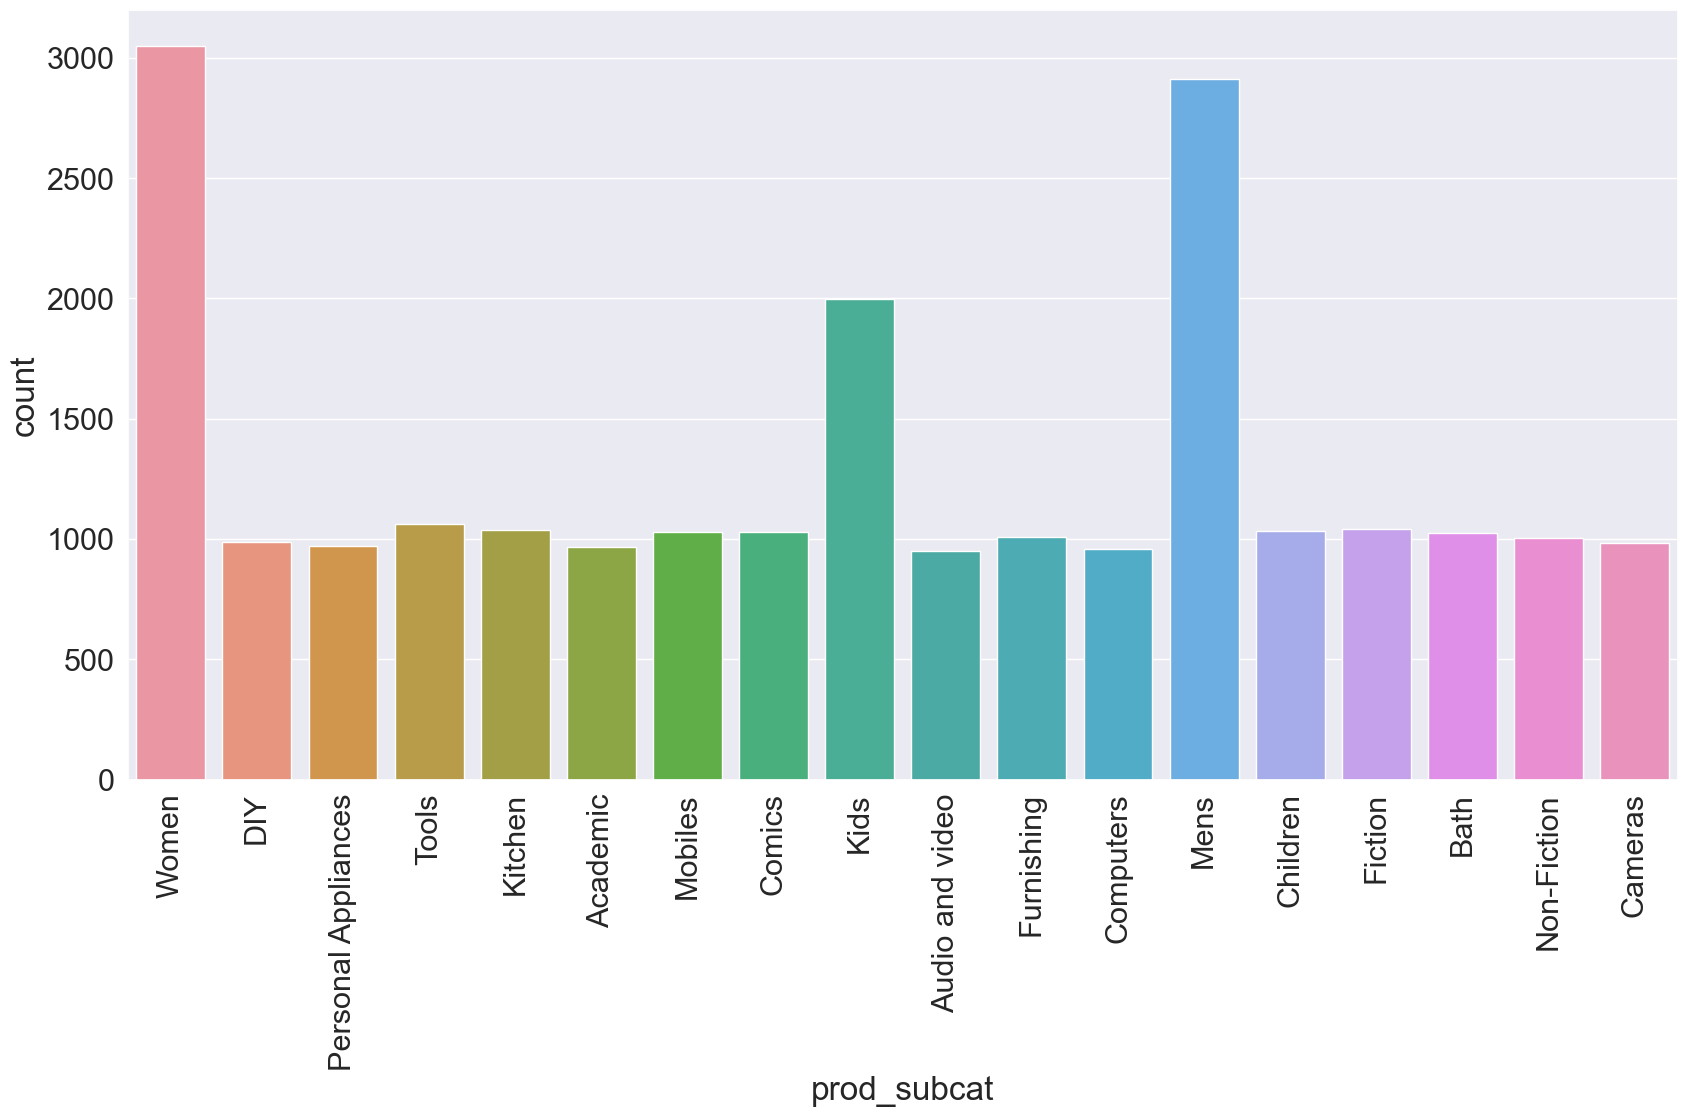

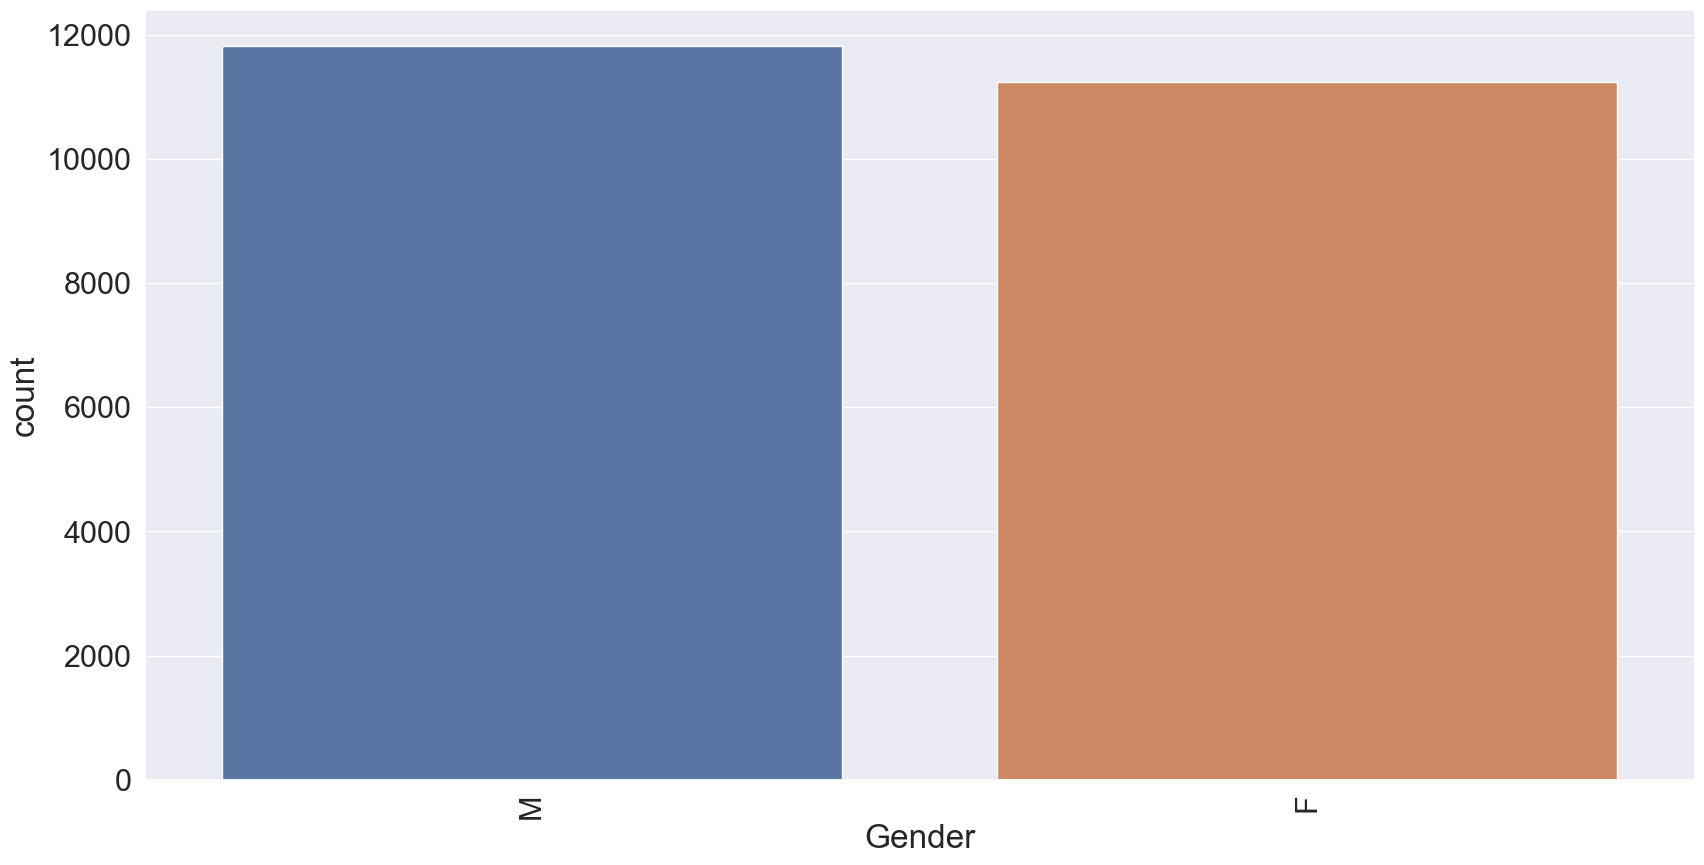

<Figure size 2000x1000 with 0 Axes>

In [46]:
### Frequency bars for categorical variables
object_types=Customer_final.select_dtypes('object')
def count_plt(x):
    plt.xticks(rotation=90)
    sns.countplot(x)
    plt.figure(figsize=[20,10])   
object_types.apply(count_plt)
plt.show()

# 4. Calculate the following information using the merged dataset :
# a. Time period of the available transaction data

In [47]:

Customer_final['DOB']=pd.to_datetime(Customer_final['DOB'],format='%d-%m-%Y')
Customer_final.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
dtype: object

In [48]:
Customer_final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.30,-4265.30,e-Shop,Clothing,Women,270351,1981-09-26,M,5.00
1,80712190438,270351,2014-02-20,1,1,5,772,405.30,4265.30,e-Shop,Clothing,Women,270351,1981-09-26,M,5.00
2,13181563739,270351,2011-12-13,6,5,1,1048,110.04,1158.04,e-Shop,Books,DIY,270351,1981-09-26,M,5.00
3,12236277258,270351,2013-03-18,8,3,3,1030,324.45,3414.45,e-Shop,Electronics,Personal Appliances,270351,1981-09-26,M,5.00
4,36957441426,270351,2013-09-16,3,2,3,361,113.72,1196.71,Flagship store,Footwear,Women,270351,1981-09-26,M,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,87125650,268666,2011-09-08,1,4,-5,-359,188.47,-1983.47,e-Shop,Bags,Mens,268666,1978-12-11,M,3.00
23049,87125650,268666,2011-05-08,1,4,5,359,188.47,1983.47,e-Shop,Bags,Mens,268666,1978-12-11,M,3.00
23050,34764580226,269784,2011-07-20,1,4,1,1057,110.98,1167.98,Flagship store,Bags,Mens,269784,1986-04-26,F,7.00
23051,80809115393,268084,2011-01-04,1,4,4,873,366.66,3858.66,TeleShop,Bags,Mens,268084,1970-11-18,M,1.00


In [49]:
max_date=Customer_final['tran_date'].max()
min_date=Customer_final['tran_date'].min()
max_date

Timestamp('2014-12-02 00:00:00')

In [50]:
time_period=pd.to_datetime(max_date)-pd.to_datetime(min_date)
print('The time data available for the given data is ',time_period)

The time data available for the given data is  1430 days 00:00:00


# b. Count of transactions where the total amount of transaction was negative

In [51]:
Negative_tran=Customer_final.loc[Customer_final['total_amt']<0,'transaction_id'].count()
print('The count of transactions where total amount was negative is',Negative_tran)

The count of transactions where total amount was negative is 2177


# 5. Analyze which product categories are more popular among females vs male customers

In [52]:
Male_vs_female=pd.pivot_table(data=Customer_final,values='Qty',index='Gender',columns='prod_cat',aggfunc='sum')
Male_vs_female

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2362,7070,3425,5832,3716,4895
M,2346,7587,3748,6476,3555,5041


# 6. Which City code has the maximum customers and what was the percentage of customers from that city?


In [87]:
customer_group = pd.pivot_table(data=Customer_final,index='city_code',values='customer_Id',aggfunc='count').sort_values('customer_Id',ascending=False)
customer_group['Percent']=(customer_group['customer_Id'] / customer_group['customer_Id'].sum())*100
customer_group=customer_group.reset_index()
customer_group

,city_code,customer_Id,Percent
0,4.00,2422,10.51
1,3.00,2411,10.46
2,5.00,2360,10.24
3,7.00,2356,10.22
4,10.00,2333,10.12
5,8.00,2330,10.11
6,2.00,2270,9.85
7,1.00,2258,9.80
8,9.00,2178,9.45
9,6.00,2127,9.23


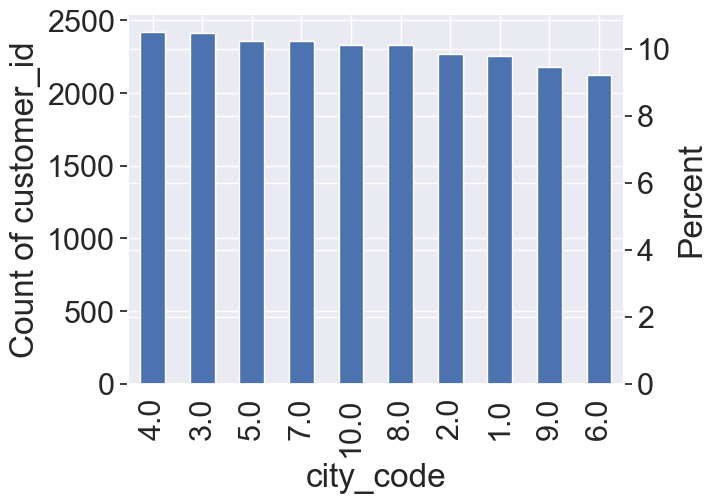

In [94]:
fig, ax1 = plt.subplots()

customer_group.plot(kind='bar', x='city_code', y='customer_Id', ax=ax1,legend=False)
ax1.set_ylabel('Count of customer_id')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
customer_group.plot(kind='bar', x='city_code', y='Percent', ax=ax2,legend=False)
ax2.set_ylabel('Percent')
ax2.tick_params(axis='y')
plt.show()

# 7. Which store type sells the maximum products by value and by quantity?


In [55]:
max_sale_store=pd.pivot_table(data=Customer_final,values=['Qty','total_amt'],index='Store_type',aggfunc='sum').sort_values(by=['Qty'],ascending=False)
max_sale_store

,Qty,total_amt
Store_type,,
e-Shop,22763,19824816.05
MBR,11194,9674486.05
Flagship store,11133,9715688.19
TeleShop,10984,9364781.07


# 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?


In [56]:
(Customer_final.loc[Customer_final.prod_cat.isin(['Electronics','Clothing'])&(Customer_final.Store_type == 'Flagship store')]).groupby('prod_cat')['total_amt'].sum()

prod_cat
Clothing      1194423.23
Electronics   2215136.04
Name: total_amt, dtype: float64

# 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [57]:
Customer_final.loc[(Customer_final['Gender']=='M')&(Customer_final['prod_cat']=='Electronics')].total_amt.sum()

5703109.425

# 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [58]:
unique_tran=Customer_final.loc[(Customer_final['total_amt']>0)]
unique_tran

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
1,80712190438,270351,2014-02-20,1,1,5,772,405.30,4265.30,e-Shop,Clothing,Women,270351,1981-09-26,M,5.00
2,13181563739,270351,2011-12-13,6,5,1,1048,110.04,1158.04,e-Shop,Books,DIY,270351,1981-09-26,M,5.00
3,12236277258,270351,2013-03-18,8,3,3,1030,324.45,3414.45,e-Shop,Electronics,Personal Appliances,270351,1981-09-26,M,5.00
4,36957441426,270351,2013-09-16,3,2,3,361,113.72,1196.71,Flagship store,Footwear,Women,270351,1981-09-26,M,5.00
5,73713102191,268867,2014-02-15,1,1,1,714,74.97,788.97,MBR,Clothing,Women,268867,1987-10-24,F,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23047,84009622150,273116,2011-08-26,1,4,2,1474,309.54,3257.54,e-Shop,Bags,Mens,273116,1980-10-13,M,5.00
23049,87125650,268666,2011-05-08,1,4,5,359,188.47,1983.47,e-Shop,Bags,Mens,268666,1978-12-11,M,3.00
23050,34764580226,269784,2011-07-20,1,4,1,1057,110.98,1167.98,Flagship store,Bags,Mens,269784,1986-04-26,F,7.00
23051,80809115393,268084,2011-01-04,1,4,4,873,366.66,3858.66,TeleShop,Bags,Mens,268084,1970-11-18,M,1.00


In [59]:
pos_tran=pd.pivot_table(data=unique_tran,values='transaction_id',index=['customer_Id','prod_cat','prod_subcat'],aggfunc='count')
pos_tran

transaction_id
customer_Id prod_cat         prod_subcat                
266783      Books            Non-Fiction               1
            Clothing         Mens                      2
            Footwear         Mens                      1
266784      Books            Fiction                   1
                             Non-Fiction               1
...                                                  ...
275264      Books            Non-Fiction               1
            Home and kitchen Tools                     1
275265      Bags             Mens                      1
            Books            Academic                  1
            Home and kitchen Furnishing                1

[19278 rows x 1 columns]

In [60]:
pos_tran.loc[pos_tran['transaction_id']>10]


,,,transaction_id
customer_Id,prod_cat,prod_subcat,


In [62]:
print('There are no customers having more than 10 unique transactions')

There are no customers having more than 10 unique transactions


# 11. For all customers aged between 25 - 35, find out:

In [63]:
now = pd.Timestamp('now')
Customer_final['AGE'] = (now - Customer_final['DOB']).astype('<m8[Y]')
Customer_final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.30,-4265.30,e-Shop,Clothing,Women,270351,1981-09-26,M,5.00,41.00
1,80712190438,270351,2014-02-20,1,1,5,772,405.30,4265.30,e-Shop,Clothing,Women,270351,1981-09-26,M,5.00,41.00
2,13181563739,270351,2011-12-13,6,5,1,1048,110.04,1158.04,e-Shop,Books,DIY,270351,1981-09-26,M,5.00,41.00
3,12236277258,270351,2013-03-18,8,3,3,1030,324.45,3414.45,e-Shop,Electronics,Personal Appliances,270351,1981-09-26,M,5.00,41.00
4,36957441426,270351,2013-09-16,3,2,3,361,113.72,1196.71,Flagship store,Footwear,Women,270351,1981-09-26,M,5.00,41.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,87125650,268666,2011-09-08,1,4,-5,-359,188.47,-1983.47,e-Shop,Bags,Mens,268666,1978-12-11,M,3.00,44.00
23049,87125650,268666,2011-05-08,1,4,5,359,188.47,1983.47,e-Shop,Bags,Mens,268666,1978-12-11,M,3.00,44.00
23050,34764580226,269784,2011-07-20,1,4,1,1057,110.98,1167.98,Flagship store,Bags,Mens,269784,1986-04-26,F,7.00,36.00
23051,80809115393,268084,2011-01-04,1,4,4,873,366.66,3858.66,TeleShop,Bags,Mens,268084,1970-11-18,M,1.00,52.00


In [69]:
Young_cust=Customer_final.loc[(Customer_final['AGE']>=25) & (Customer_final['AGE']<=35)].sort_values('AGE',ascending=True)
Young_cust

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE
15257,77232232822,273564,2014-03-01,3,5,3,436,137.34,1445.34,e-Shop,Books,Comics,273564,1992-03-11,F,3.00,30.00
18849,89432753200,274474,2011-08-31,2,6,2,1334,280.14,2948.14,e-Shop,Home and kitchen,Furnishing,274474,1992-12-19,M,2.00,30.00
18848,81477948281,274474,2011-06-19,9,3,1,251,26.36,277.36,e-Shop,Electronics,Cameras,274474,1992-12-19,M,2.00,30.00
18847,8834851187,274474,2011-05-08,3,2,1,161,16.91,177.91,e-Shop,Footwear,Women,274474,1992-12-19,M,2.00,30.00
15258,2992110761,273564,2013-11-24,7,5,3,1365,429.98,4524.98,Flagship store,Books,Fiction,273564,1992-03-11,F,3.00,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15668,21858863677,272289,2012-10-25,12,6,3,956,301.14,3169.14,e-Shop,Home and kitchen,Tools,272289,1987-06-14,M,1.00,35.00
15650,21983962487,267318,2011-10-04,9,3,5,1180,619.50,6519.50,Flagship store,Electronics,Cameras,267318,1987-12-05,M,7.00,35.00
15649,37782911224,267318,2011-01-26,7,5,3,1440,453.60,4773.60,MBR,Books,Fiction,267318,1987-12-05,M,7.00,35.00
5875,31537011839,268569,2011-12-02,1,4,5,568,298.20,3138.20,TeleShop,Bags,Mens,268569,1987-09-02,M,4.00,35.00



# a. What was the total amount spent for “Electronics” and “Books” product categories?


In [76]:
(Young_cust.loc[Young_cust.prod_cat.isin(['Electronics','Books'])]).groupby('prod_cat')['total_amt'].sum()

prod_cat
Books         3137783.42
Electronics   2864287.08
Name: total_amt, dtype: float64

# b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [77]:
Young_cust.loc[Young_cust['tran_date'].between('2014-1-1','2014-3-1')].total_amt.sum()

426047.115